In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
df = pd.read_csv('student_marks.csv')
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [4]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [5]:
df.study_hours.mean()

6.9959487179487185

In [8]:
df =df.fillna(df.study_hours.mean())
df

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [10]:
x = df.drop('student_marks',axis=1)
x

,study_hours
0,6.830000
1,6.560000
2,6.995949
3,5.670000
4,8.670000
...,...
195,7.530000
196,8.560000
197,8.940000
198,6.600000


In [11]:
y= df.drop('study_hours',axis=1)
y

,student_marks
0,78.50
1,76.74
2,78.68
3,71.82
4,84.19
...,...
195,81.67
196,84.68
197,86.75
198,78.05


In [15]:
mean_x = x.mean()
mean_y = y.mean()
mean_x,mean_y

(study_hours    6.995949
 dtype: float64,
 student_marks    77.93375
 dtype: float64)

In [16]:
reg = LinearRegression()

In [17]:
reg.fit(x,y)

LinearRegression()

In [20]:
m=reg.coef_


In [21]:
c=reg.intercept_

In [22]:
m*x+c

,study_hours
0,77.287139
1,76.235097
2,77.933750
3,72.767254
4,84.456611
...,...
195,80.014655
196,84.028001
197,85.508653
198,76.390955


Text(0.5, 1.0, 'Marks Prediction')

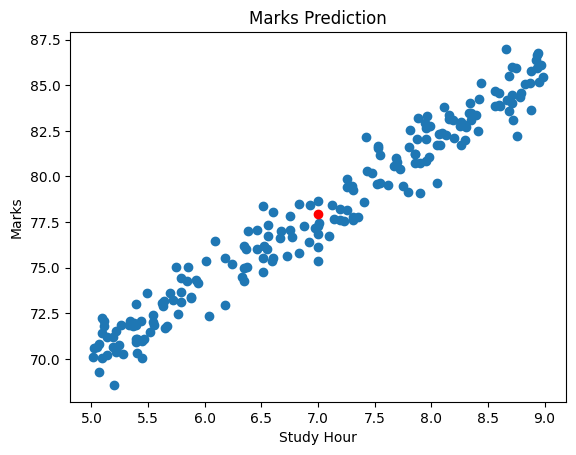

In [24]:
plt.scatter(x,y)
plt.scatter(mean_x,mean_y, color ='red')
plt.xlabel('Study Hour')
plt.ylabel('Marks')
plt.title('Marks Prediction')

In [28]:
df['predicted_y']= reg.predict(x)
df

,study_hours,student_marks,predicted_y
0,6.830000,78.50,77.287139
1,6.560000,76.74,76.235097
2,6.995949,78.68,77.933750
3,5.670000,71.82,72.767254
4,8.670000,84.19,84.456611
...,...,...,...
195,7.530000,81.67,80.014655
196,8.560000,84.68,84.028001
197,8.940000,86.75,85.508653
198,6.600000,78.05,76.390955


Text(0.5, 1.0, 'Salary Prediction')

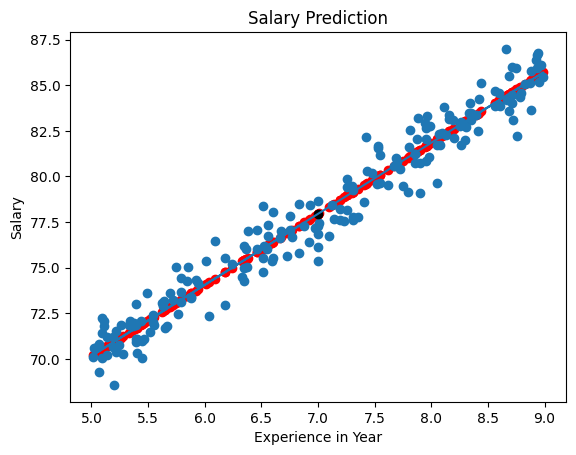

In [31]:
plt.scatter(x,df['predicted_y'],color ='red')
plt.plot(x,df['predicted_y'])
plt.scatter(x,y)
plt.scatter(mean_x,mean_y, color ='Black')
plt.xlabel('Experience in Year')
plt.ylabel('Salary')
plt.title('Salary Prediction')

In [34]:
df['absolute_loss'] = abs(df['student_marks']-df['predicted_y'])
df.head()

,study_hours,student_marks,predicted_y,absolute_loss
0,6.830000,78.50,77.287139,1.212861
1,6.560000,76.74,76.235097,0.504903
2,6.995949,78.68,77.933750,0.746250
3,5.670000,71.82,72.767254,0.947254
4,8.670000,84.19,84.456611,0.266611


In [36]:
mse = mean_squared_error(y,df['predicted_y'])
mse

1.0176711552184095

In [37]:
mae= mean_absolute_error(y,df['predicted_y'])
mae

0.8075744171102636

In [41]:
sum(df['absolute_loss'])/len(x)

0.807574417110263

In [39]:
reg.score(x,y)

0.957845054589008